**ALAOUI Brahim**

**Master : BIBDA**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
# Chargement des donnees
data = pd.read_csv("TP6_dataset.csv")

df = pd.DataFrame(data)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,5.33,36.2


In [7]:
# Separer les variables independantes (X) et la variable dependante (y)
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# Standardiser les donnees
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Diviser les donnees en ensembles d'entrainement et de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [14]:
# Definir le modele MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Une seule sortie pour predire le prix des maisons
])

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 600.2417 - mae: 22.8205 - val_loss: 493.9078 - val_mae: 20.7341
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 551.9324 - mae: 21.6105 - val_loss: 453.7307 - val_mae: 19.8334
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 509.4408 - mae: 20.8535 - val_loss: 405.6357 - val_mae: 18.6842
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 474.6646 - mae: 19.8720 - val_loss: 344.6213 - val_mae: 17.1131
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 378.5563 - mae: 17.6794 - val_loss: 272.6473 - val_mae: 15.0300
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 293.2210 - mae: 15.3134 - val_loss: 196.1206 - val_mae: 12.4121
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 232.0923 - mae: 13.0416 - val_loss: 124.5098 - val_mae: 9.4431
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 168.7800 - mae: 10.6704 - val_loss: 75.9974 - val_mae: 7.1205
Epoch 9/100

In [28]:
# evaluer le modele sur les donnees de test
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {test_mae:.2f}, Test Loss (MSE): {test_loss:.2f}")


Test MAE: 2.69, Test Loss (MSE): 16.99


In [30]:
# faire des predictions sur l'ensemble de test
y_pred = model.predict(X_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [32]:
# calculer MSE et R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

MSE: 16.99
R-squared: 0.79


In [34]:
# analyse des metriques
if r2 > 0.8:
    print("Le modele a un bon niveau de prediction.")
elif r2 > 0.6:
    print("Le modele a un niveau moyen de prediction.")
else:
    print("Le modele a un faible niveau de prediction.")

if mse < 20:
    print("Le modele genere peu d'erreurs.")
else:
    print("Le modele genere trop d'erreurs.")

Le modele a un niveau moyen de prediction.
Le modele genere peu d'erreurs.


NameError: name 'history' is not defined

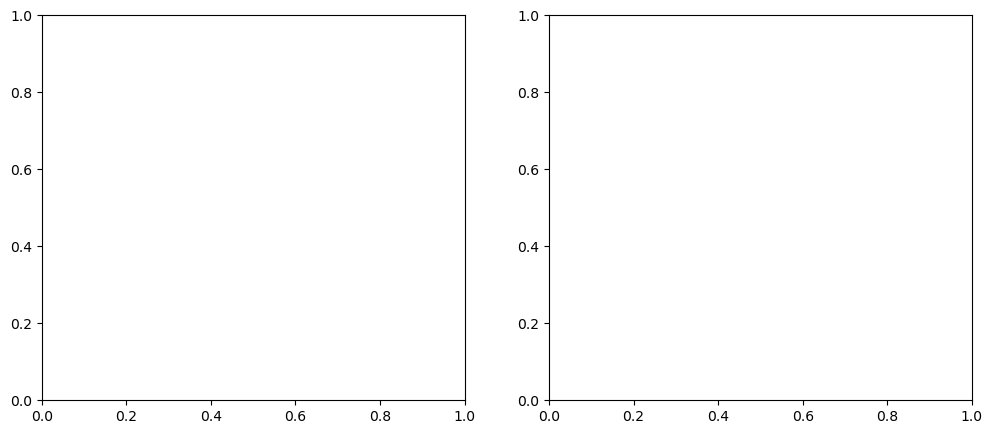

In [9]:
# Afficher les courbes d'apprentissage
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Courbe de perte (MSE)
axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title("Courbe de perte (MSE)")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss (MSE)")
axs[0].legend()

# Courbe de MAE
axs[1].plot(history.history['mae'], label='Train MAE')
axs[1].plot(history.history['val_mae'], label='Validation MAE')
axs[1].set_title("Courbe de MAE")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("MAE")
axs[1].legend()

plt.show()